## Synthesis Data

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
x = np.random.normal(0, 1, 1000)
y = np.sin(2*x) + np.random.normal(0, 0.1, 1000)

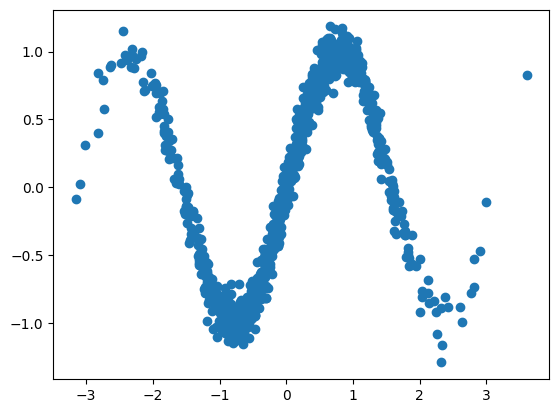

In [13]:
plt.scatter(x, y)
plt.show()

## Simulation with tensorflow

Assuming $$\hat{y}=\beta_0+\beta_1x$$

In [79]:
W1 = tf.Variable(0.0, name = "W1")
W2 = tf.Variable(0.0, name = "W2")
W3 = tf.Variable(0.0, name = "W3")
b = tf.Variable(0.0, name = "b")

In [80]:
lr = 0.001
epochs = 10000

In [81]:
def mse_model(x, y, b0, b1, b2, b3):
    predy = b0 + b1*x + b2*(x**2) + b3*(x**3)
    error = (predy - y)**2

    return tf.reduce_mean(error)

def gradient_lr(x, y, b0, b1, b2, b3):
    with tf.GradientTape() as tape:
        loss = mse_model(x, y, b0, b1, b2, b3)
        
    return tape.gradient(loss, [b3, b2, b1, b0])

In [82]:
for e in range(0, epochs+1):
    db3, db2, db1, db0 = gradient_lr(x, y, b, W1, W2, W3)

    W3.assign_sub(db3*lr)
    W2.assign_sub(db2*lr)
    W1.assign_sub(db1*lr)
    b.assign_sub(db0*lr)

    if e % 1000 == 0:
        loss = mse_model(x, y, b, W1, W2, W3)
        print('Epoch ', e, '; Loss: ',loss)

Epoch  0 ; Loss:  tf.Tensor(0.48956543, shape=(), dtype=float32)
Epoch  1000 ; Loss:  tf.Tensor(0.29395476, shape=(), dtype=float32)
Epoch  2000 ; Loss:  tf.Tensor(0.2529033, shape=(), dtype=float32)
Epoch  3000 ; Loss:  tf.Tensor(0.24412529, shape=(), dtype=float32)
Epoch  4000 ; Loss:  tf.Tensor(0.24224827, shape=(), dtype=float32)
Epoch  5000 ; Loss:  tf.Tensor(0.24184693, shape=(), dtype=float32)
Epoch  6000 ; Loss:  tf.Tensor(0.24176107, shape=(), dtype=float32)
Epoch  7000 ; Loss:  tf.Tensor(0.24174273, shape=(), dtype=float32)
Epoch  8000 ; Loss:  tf.Tensor(0.2417388, shape=(), dtype=float32)
Epoch  9000 ; Loss:  tf.Tensor(0.24173798, shape=(), dtype=float32)
Epoch  10000 ; Loss:  tf.Tensor(0.24173777, shape=(), dtype=float32)


In [83]:
value = tf.get_static_value(W3*(x**3)+W2*(x**2)+W1*x+b)

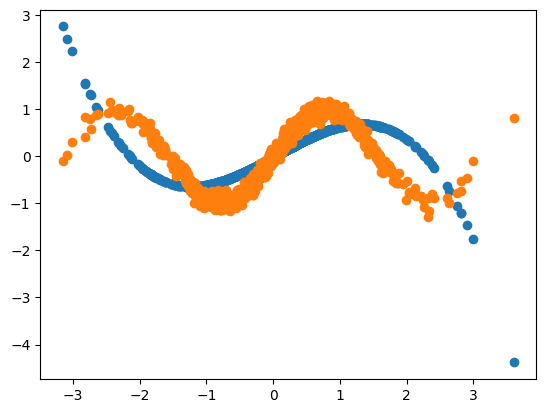

In [84]:
plt.scatter(x, value)
plt.scatter(x, y)